# IMPORTS


In [1]:
import pandas as pd
import inflection
import math 
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML
import datetime

from IPython.display import Image

## Helper functions


def jupyter_settings():
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

jupyter_settings()

In [46]:
plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24

sns.set ()

## Loading data

In [3]:
df_sales_raw = pd.read_csv ('data/train.csv', low_memory = False)
df_store_raw = pd.read_csv ('data/store.csv', low_memory = False)

df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

In [4]:
df_raw.sample(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
24062,648,5,2015-07-10,5492,537,1,0,0,0,d,a,2130.0,12.0,2008.0,0,NaN,NaN,NaN
506688,149,4,2014-04-03,6084,521,1,1,0,0,d,a,2610.0,7.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [5]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# PASSO 1. DESCRICAO DOS DADOS

In [6]:
df1 = df_raw.copy()

## Rename Columns

In [7]:
cols_old = [ 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 
             'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
            'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore (x)

cols_new = map (snakecase, cols_old)

#rename
df1.columns = cols_new

In [8]:
# <notion> 
# inflection.underscore () - metodo para passar de KamelCase para snak_case 

# cols_old = [ 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 
#              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
#             'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

# snakecase = lambda x: inflection.underscore (x)

# cols_new = map (snakecase, cols_old)

# #rename
# df1.columns = cols_new

## Data Dimensions

In [9]:
print ('Number of Rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of columns: 18


## Data Types

In [10]:
df1['date'] = pd.to_datetime( df1['date'] ) 
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## Check NA

In [11]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## Fillout NA

In [12]:
df1[ (df1['competition_open_since_month'].isna()) & (df1['competition_distance'].isna() ) ]

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,5,2015-07-31,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,5,2015-07-31,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1736,622,4,2015-07-30,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,622,3,2013-01-02,4080,451,1,0,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
1015858,879,3,2013-01-02,3077,326,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1016385,291,2,2013-01-01,0,0,0,0,a,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1016716,622,2,2013-01-01,0,0,0,0,a,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


In [13]:
df1['competition_distance'].max()

75860.0

In [14]:
# competition_distance   
#     !presume-se: se a distancia é muito grande, nao ha competidor proximo. 
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)


# competition_open_since_month    
#     !presume-se: se estiver na, e 'competition_distance' not null, considera-se a 'date', ja que nao faz sentido existir 
#         um competidor proximo que nao tenha inaugurado a loja ainda
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis =1)


# competition_open_since_year
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis =1)


# promo2_since_week
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis =1)

# promo2_since_year 
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis =1)

# promo_interval    
month_map = { 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec' }

df1['promo_interval'].fillna(0, inplace = True )

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [15]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [16]:
# <notion> 
# math.isnan () - metodo booleano para identificar os NA

# df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)


## Change Dtypes

obs: após realizar alteracoes substanciais nos dados, é importante verificar os tipos

In [17]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [18]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')

df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')

df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')

df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')

## Descriptive Statical 

In [19]:
num_attributes = df1.select_dtypes ( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes ( exclude=['int64','float64'] )

### Numerical Attributes

In [20]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat ( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


<AxesSubplot:xlabel='competition_distance', ylabel='Count'>

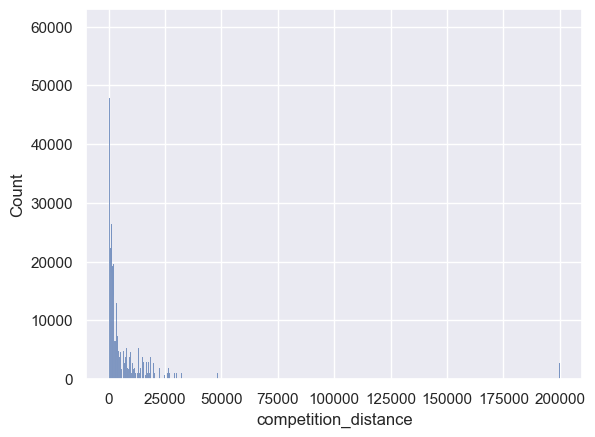

In [21]:
# plotando a coluna 'competition_distance' para estudar melhor o fenomeno visualmente
sns.histplot ( df1['competition_distance'] )

### Categorical Attributes

In [22]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

date              942
state_holiday       4
store_type          4
assortment          3
promo_interval      4
month_map          12
dtype: int64

In [23]:
df1[df1['state_holiday']=='0']['sales'].mean()

5947.48389255688

In [24]:
#aqui considerou-se os feriados, e tambem as vendas = 0, portanto o grafico trouxe todos pontos !=0 como outliers 
# sns.boxplot (x = 'state_holiday' , y = 'sales' , data = df1)

<AxesSubplot:xlabel='assortment', ylabel='sales'>

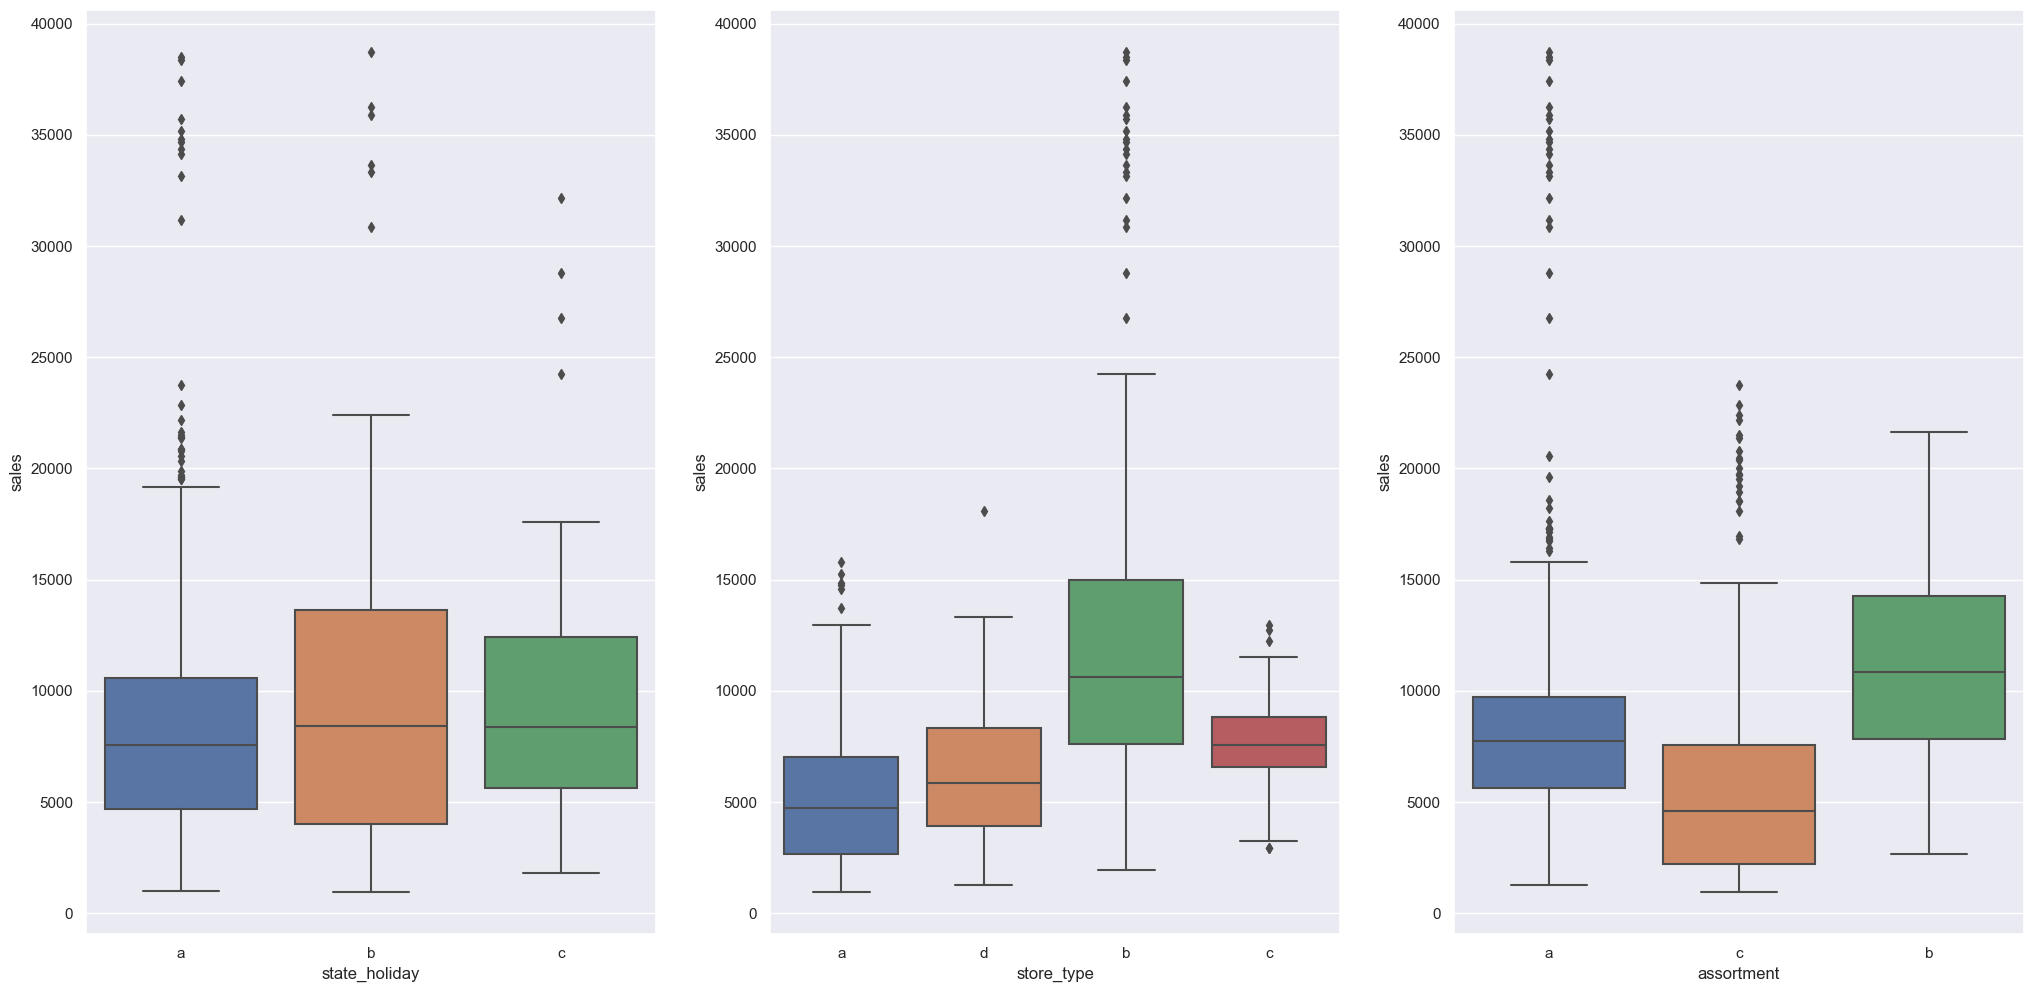

In [47]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales']>0)]

plt.subplot (1, 3, 1)
sns.boxplot (x = 'state_holiday' , y = 'sales' , data = aux1)

plt.subplot (1, 3, 2)
sns.boxplot (x = 'store_type' , y = 'sales' , data = aux1)

plt.subplot (1, 3, 3)
sns.boxplot (x = 'assortment' , y = 'sales' , data = aux1)

# PASSO 2. FEATURE ENGINEERING

In [75]:
df2 = df1.copy ()

## Mapa mental de hipoteses

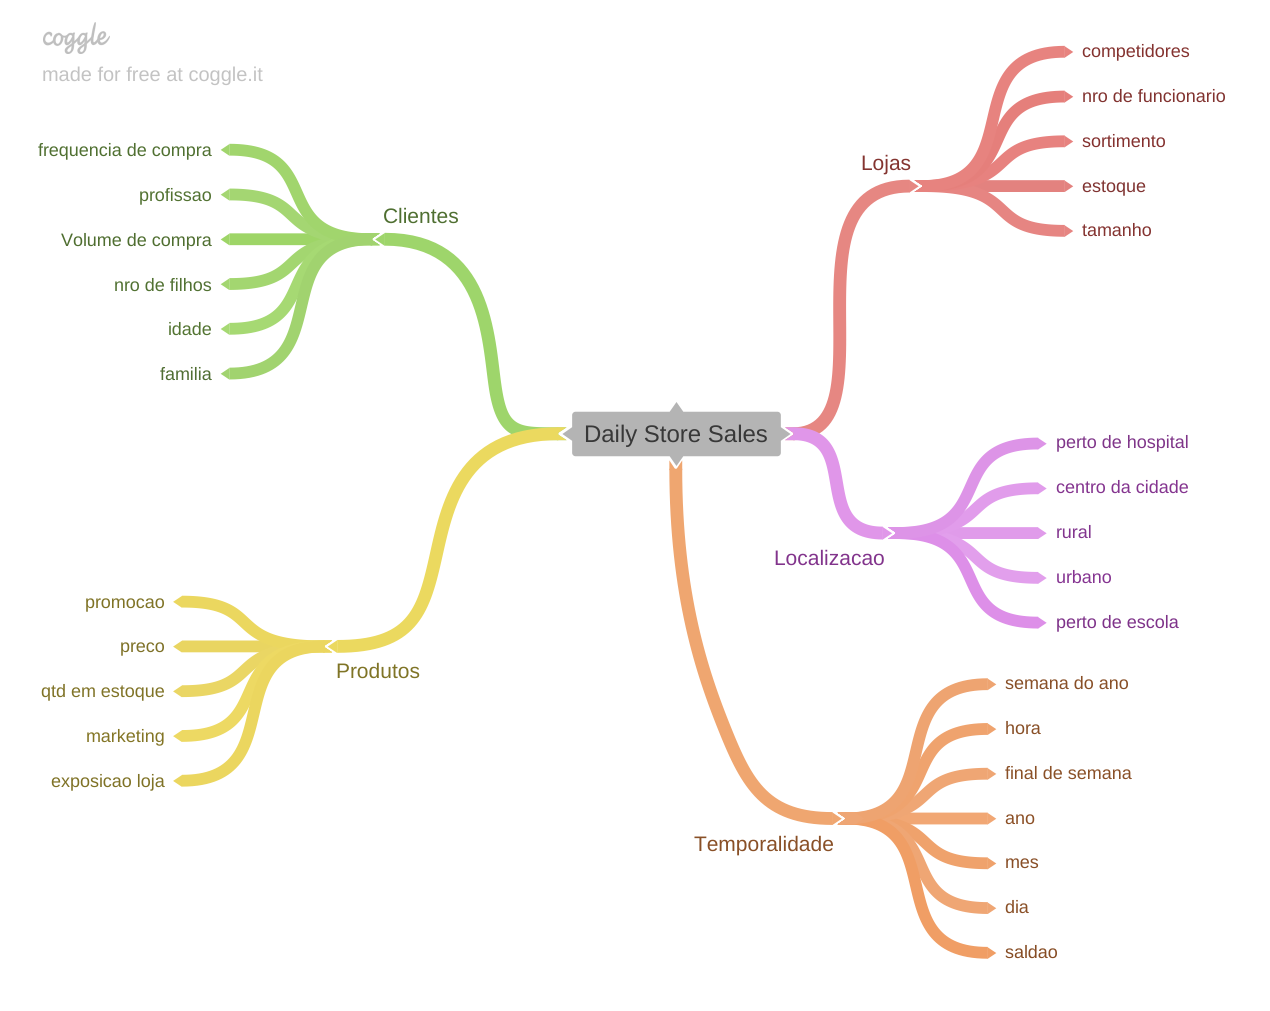

In [76]:
Image ('img/MindMapHypothesis.png')

## Criacao das hipoteses

### Hipoteses Loja

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vendem mais.



### Hipoteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**5.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**7.** Lojas com mais dias de promoção deveriam vender mais.

**8.** Lojas com mais promoções consecutivas deveriam vender mais.

### Hipoteses Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

### Lista Final de Hipoteses 

obs: priorizar com base na disponibilidade atual do dado

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

**8.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**9.** Lojas deveriam vender mais ao longo dos anos.

**10.** Lojas deveriam vender mais no segundo semestre do ano.

**11.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**12.** Lojas deveriam vender menos aos finais de semana.

**13.** Lojas deveriam vender menos durante os feriados escolares.


### Feature Engineering

In [77]:
# year
df2['year'] = df2['date'].dt.year

# month 
df2['month'] = df2['date'].dt.month

# # day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )
df2.head()

# competition since
#     |intervalo entre inicio da competicao até date
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year = x['competition_open_since_year'], month = x['competition_open_since_month'], day = 1 ), axis=1 )
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply( lambda x: x.days ).astype ( int ) 

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype ( str ) + '-' + df2['promo2_since_week'].astype ( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta ( days=7 ) )
df2['promo_time_week'] = ( (df2['date'] - df2['promo_since'])/7 ).apply( lambda x: x.days ).astype( int )

# assortment
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )


In [78]:
# <notion> 

# .dt.isocalendar().week - atributo para extrair apenas a semana do ano
    # df2['week_of_year'] = df2['date'].dt.isocalendar().week

# datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta ( days=7 ) - para calcular a diferenca 
# em semanas de uma string de data no formato %Y-%W-%w
#     datetime.timedelta ( days=7 ) - é como se gerasse uma unidade que contem 7 dias
    # # promo since
    # df2['promo_since'] = df2['promo2_since_year'].astype ( str ) + '-' + df2['promo2_since_week'].astype ( str )
    # df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta ( days=7 ) )
    # df2['promo_time_week'] = ( (df2['date'] - df2['promo_since'])/7 ).apply( lambda x: x.days ).astype( int )

In [79]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# PASSO 3. FILTRAGEM DAS VARIAVEIS

In [80]:
df3 = df2.copy()

In [81]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## Filtragem das linhas
obs: fazer a filtragem das linhas primeiro, pode fazer dimunuir o dataset, o que melhora performance

In [82]:
df3 = df3[ (df3['open'] != 0) &  (df3['sales'] > 0) ]

# open: quando igual a zero, a loja esta fechada, e nao tem venda, nao gera nenhum aprendizado pro modelo 
# sales: mesmo caso de open

## Selecao das colunas

In [83]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']

df3 = df3.drop( cols_drop, axis = 1 )


# customers: como nao se tem uma previsao de quantos clientes terao em 6 semanas, nao se tera esse input no modelo, 
#     entao é preciso filtrar essa variavel, por conta de uma restricao de negocio
# open: dado que filtrou-se os dias fechados, essa coluna nao é mais necessaria
# promo_interval e month_map: features ja foram derivadas
                 

In [84]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# PASSSO 4. ANALISE EXPLORATORIA DE DADOS

In [85]:
df4 = df3.copy()

## Analise Univariada

### Response Variable

Para melhor acuracia dos modelos, os dados precisam estar o mais normalizados possivel, aí pode se valer de algumas **transformacoes**, por exemplo aplicar a escala logaritimica 

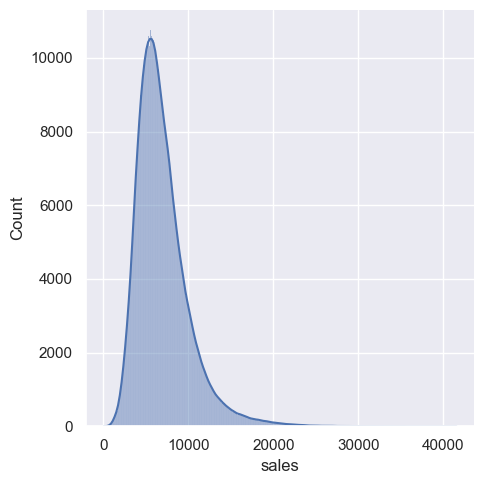

In [86]:
sns.displot (df4['sales'], kde=True)

### Numerical Variable

In [87]:
num_attributes

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
0,1,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015,0
1,2,5,6064,625,1,1,1,570.0,11,2007,1,13,2010,1
2,3,5,8314,821,1,1,1,14130.0,12,2006,1,14,2011,1
3,4,5,13995,1498,1,1,1,620.0,9,2009,0,31,2015,0
4,5,5,4822,559,1,1,1,29910.0,4,2015,0,31,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1,1900.0,6,2014,1,31,2013,1
1017205,1112,2,0,0,0,0,1,1880.0,4,2006,0,1,2013,0
1017206,1113,2,0,0,0,0,1,9260.0,1,2013,0,1,2013,0
1017207,1114,2,0,0,0,0,1,870.0,1,2013,0,1,2013,0


array([[<AxesSubplot:title={'center':'store'}>,
        <AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'customers'}>],
       [<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'promo'}>,
        <AxesSubplot:title={'center':'school_holiday'}>,
        <AxesSubplot:title={'center':'competition_distance'}>],
       [<AxesSubplot:title={'center':'competition_open_since_month'}>,
        <AxesSubplot:title={'center':'competition_open_since_year'}>,
        <AxesSubplot:title={'center':'promo2'}>,
        <AxesSubplot:title={'center':'promo2_since_week'}>],
       [<AxesSubplot:title={'center':'promo2_since_year'}>,
        <AxesSubplot:title={'center':'is_promo'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

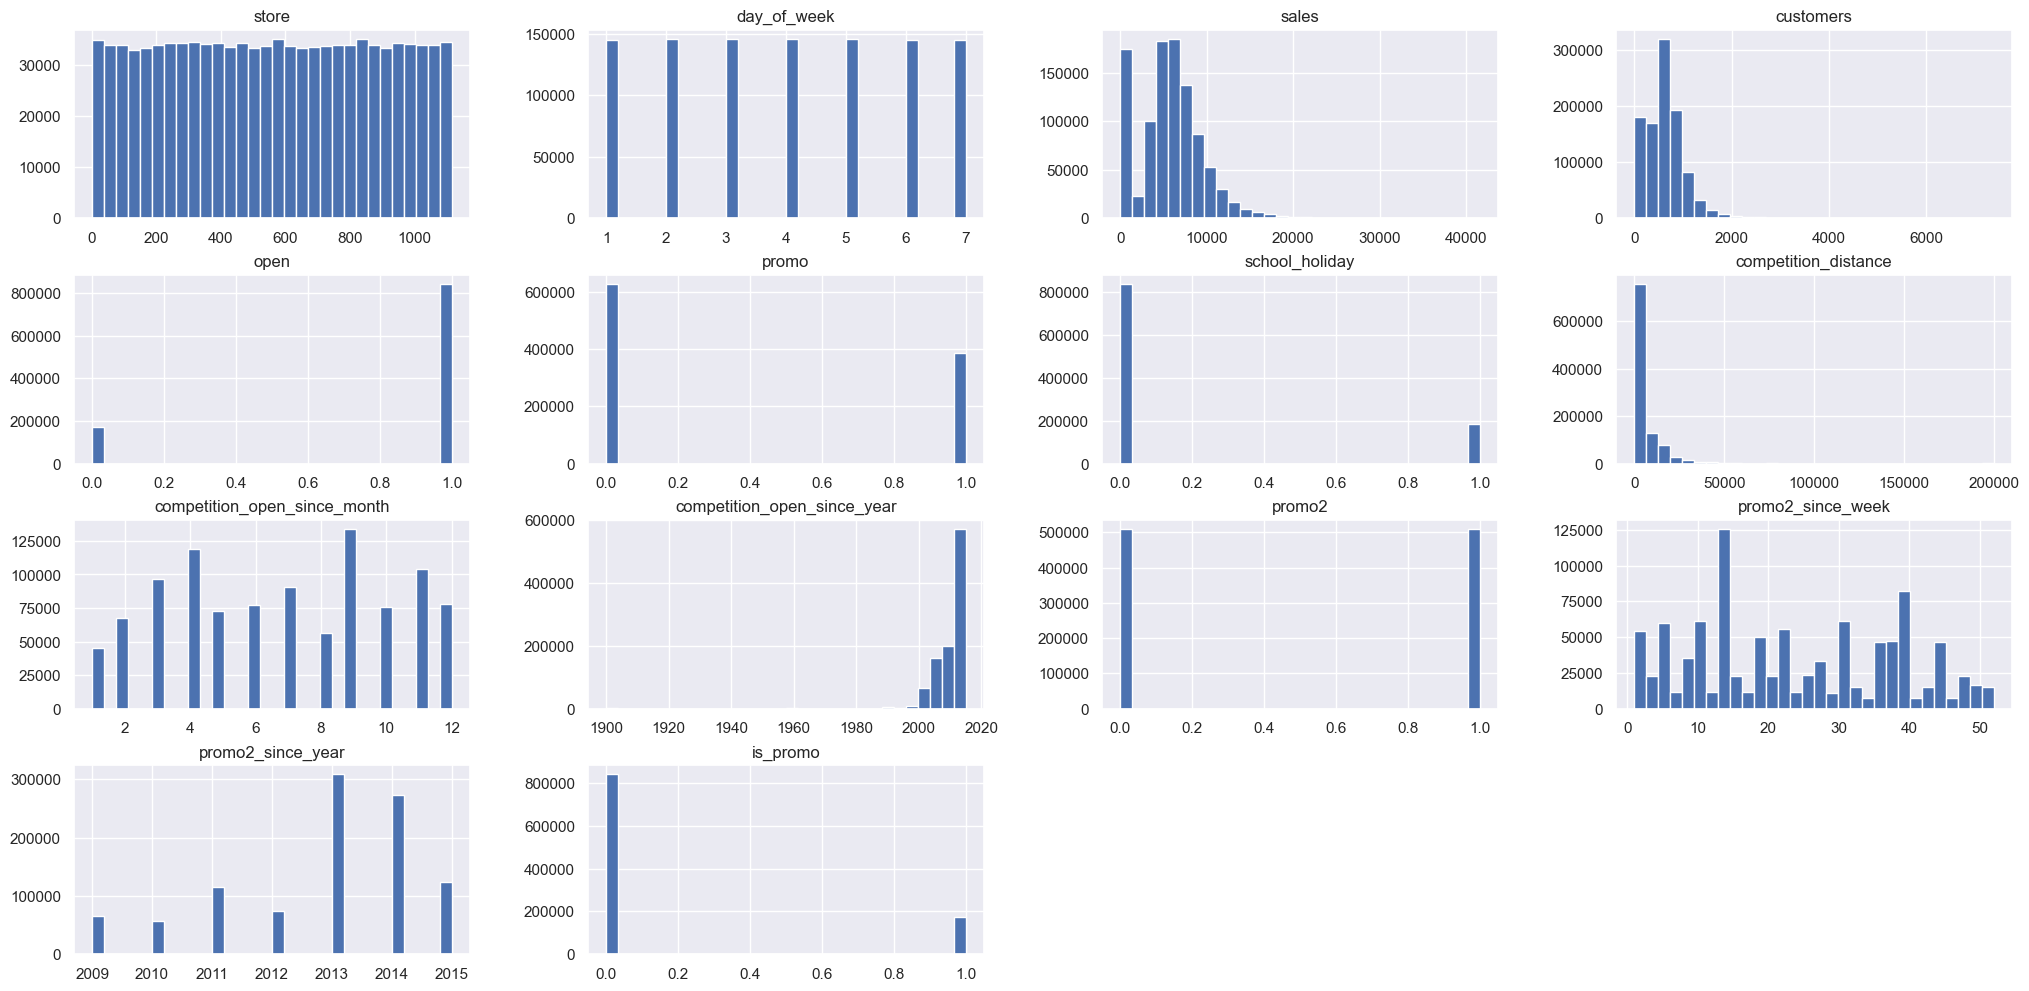

In [88]:
sns.set()
num_attributes.hist( bins=30 )



### Categorical Variable

In [89]:
cat_attributes.head()

,date,state_holiday,store_type,assortment,promo_interval,month_map
0,2015-07-31,0,c,a,0,Jul
1,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,2015-07-31,0,c,c,0,Jul
4,2015-07-31,0,a,a,0,Jul


In [100]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

<AxesSubplot:xlabel='sales', ylabel='Density'>

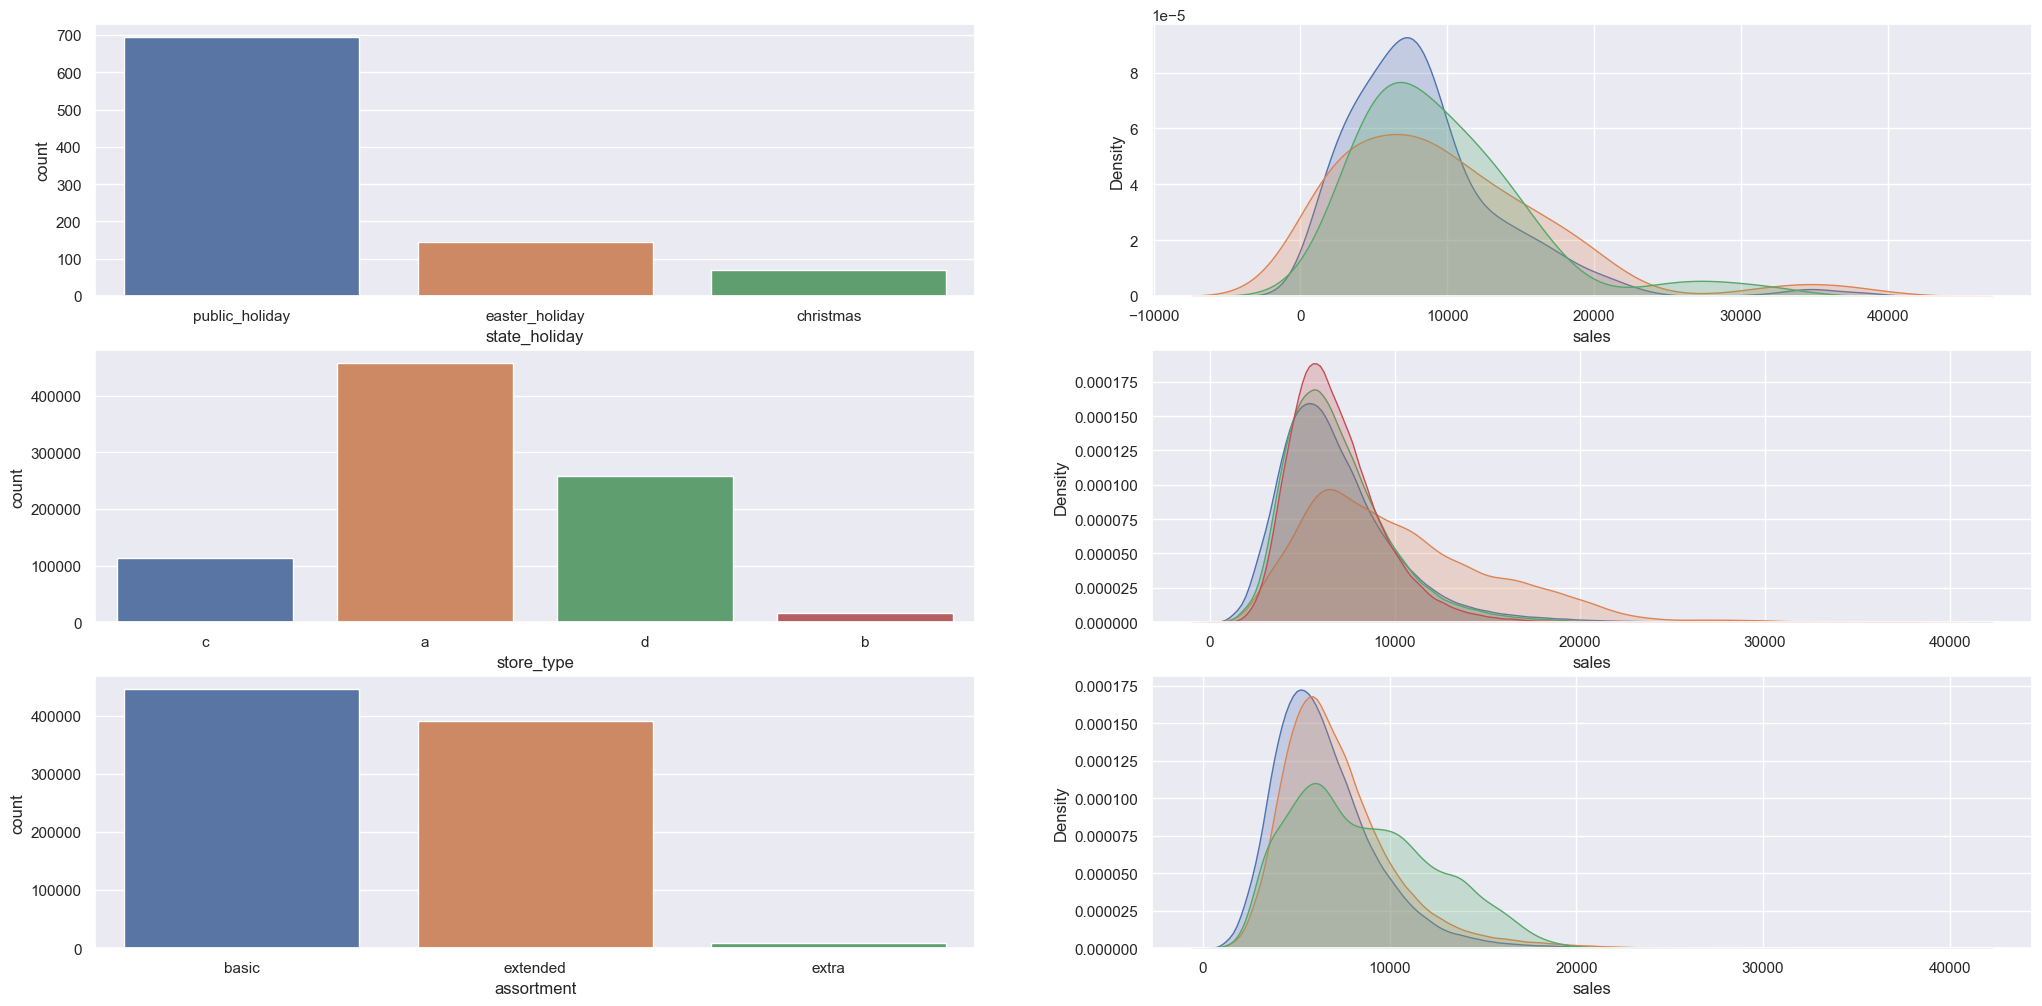

In [101]:
# state_holiday
plt.subplot (3, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot (x=a['state_holiday'])

plt.subplot (3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday', fill=True, legend = True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label = 'easter_holiday', fill=True, legend = True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label = 'christmas', fill=True, legend = True)

# store_type
plt.subplot (3, 2, 3)
sns.countplot (x=df4['store_type'])

plt.subplot (3, 2, 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label = 'a', fill=True, legend = True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label = 'b', fill=True, legend = True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label = 'c', fill=True, legend = True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label = 'd', fill=True, legend = True)

# assortment
plt.subplot (3,2,5)
sns.countplot (x=df4['assortment'])

plt.subplot (3, 2, 6)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label = 'basic', fill=True, legend = True)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label = 'extended', fill=True, legend = True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label = 'extra', fill=True, legend = True)


In [ ]:
# <notion>
# plt.subplot ( rows, cols , position) - para plotar um grid onde serao inseridos os graficos

# # state_holiday
# plt.subplot (3, 2, 1)
# a = df4[df4['state_holiday'] != 'regular_day']
# sns.countplot (x=a['state_holiday'])

# plt.subplot (3, 2, 2)
# sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday', fill=True, legend = True)
# sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label = 'easter_holiday', fill=True, legend = True)
# sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label = 'christmas', fill=True, legend = True)

## Analise Bivariada

### H4. Lojas com maior sortimentos deveriam vender mais.
**FALSE**. Lojas com MAIOR sortimento vendem MENOS.


In [106]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

In [117]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

<AxesSubplot:xlabel='assortment', ylabel='sales'>

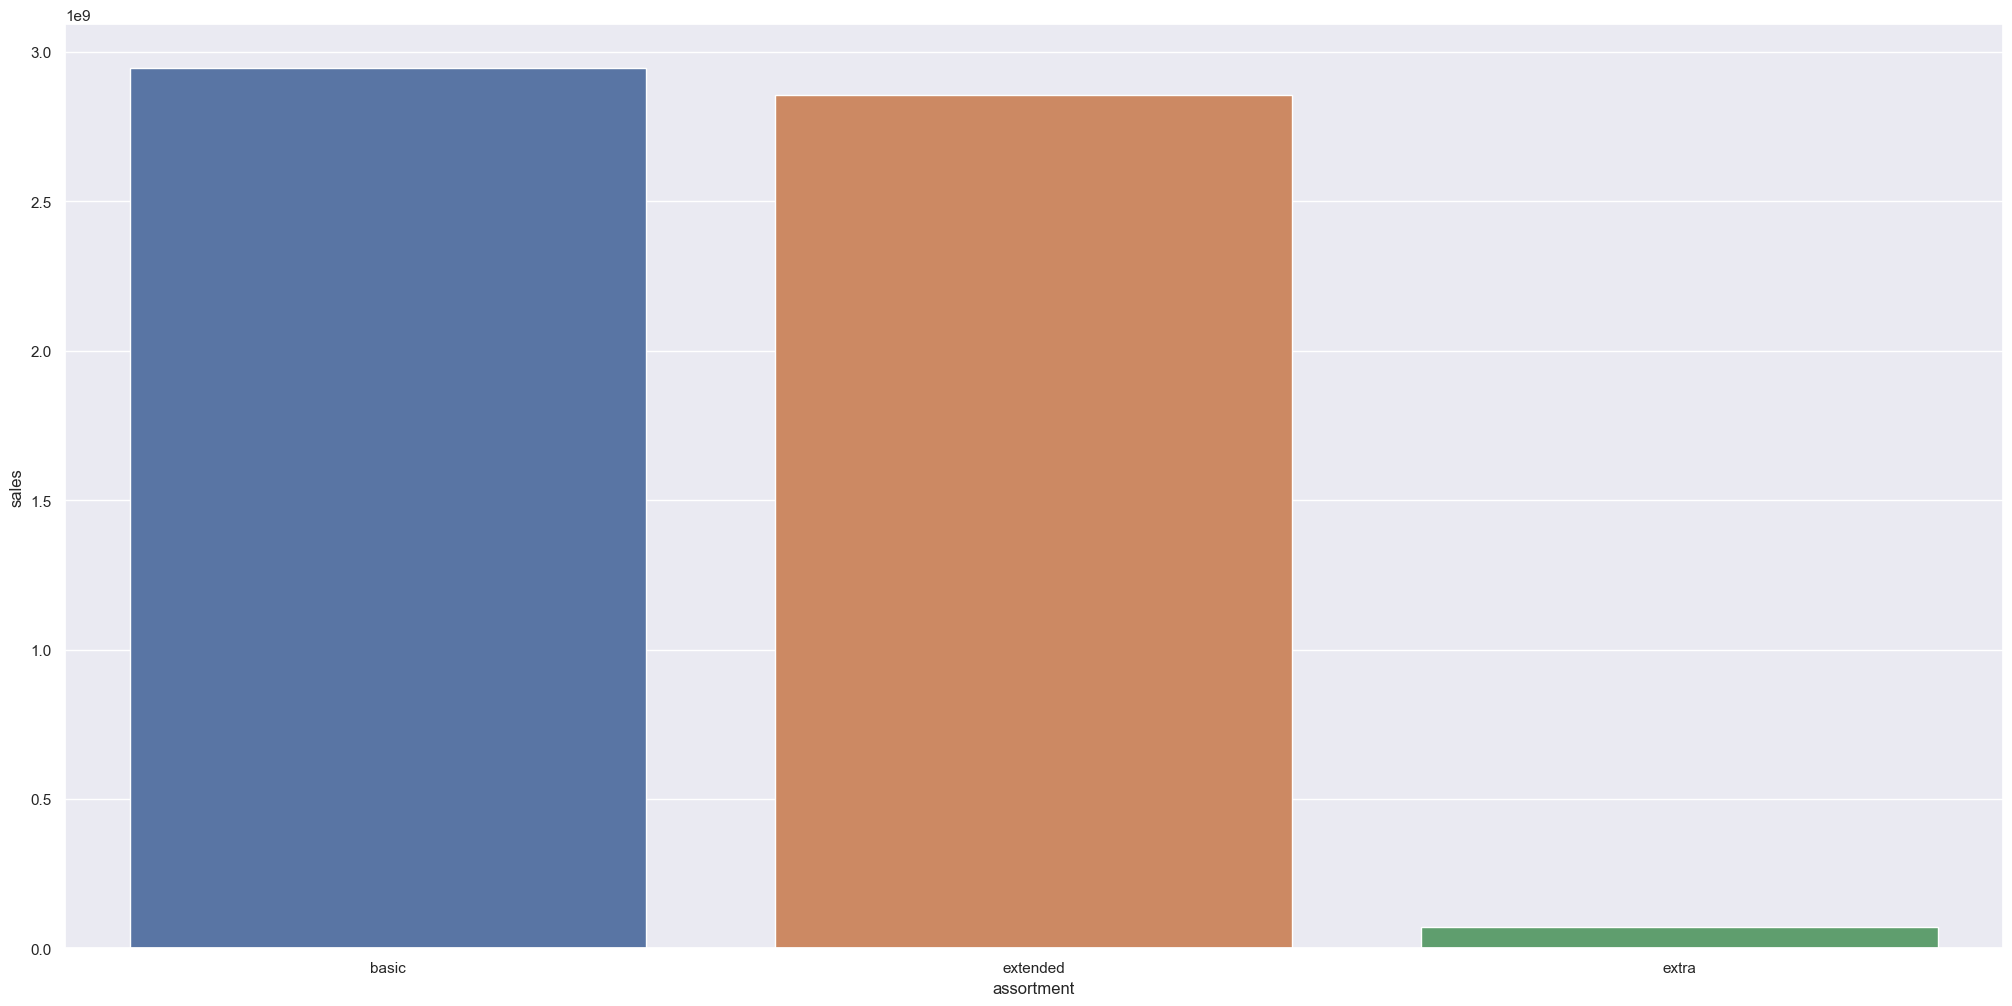

In [115]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot (x = 'assortment', y = 'sales', data = aux1)


<AxesSubplot:xlabel='year_week'>

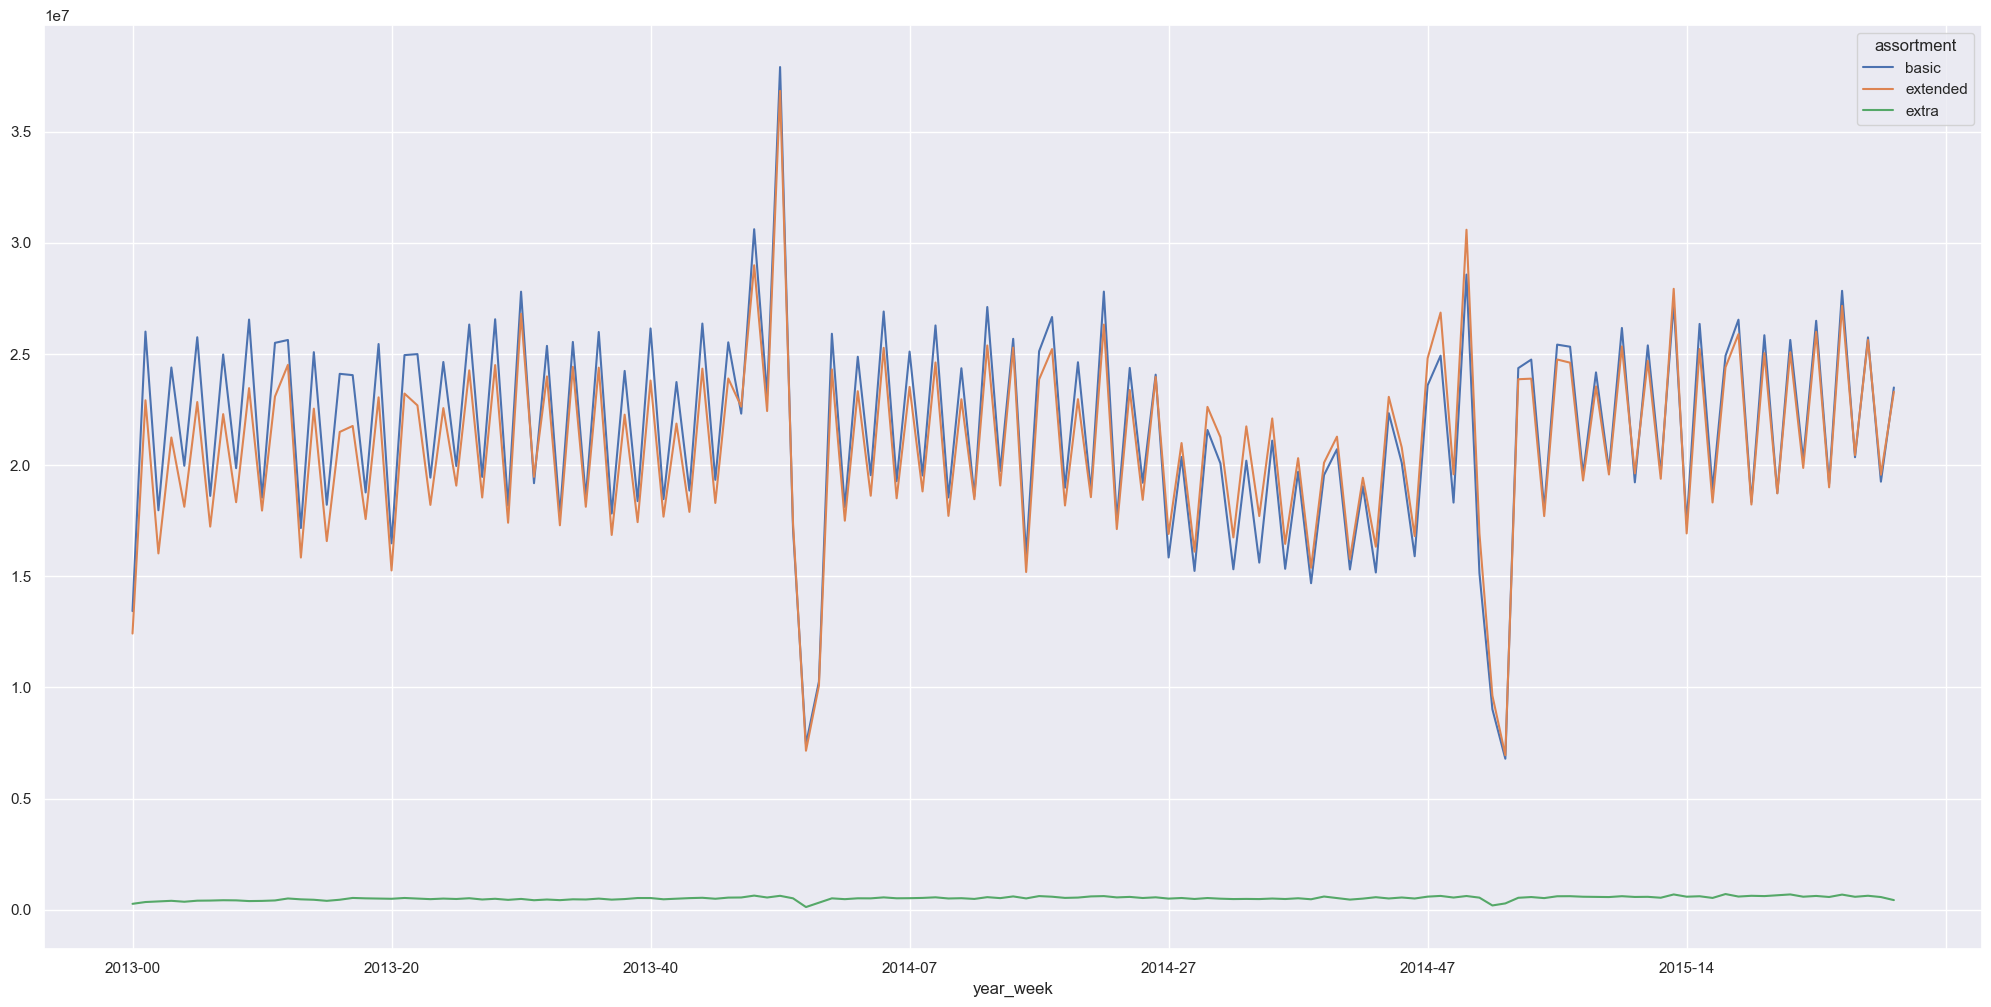

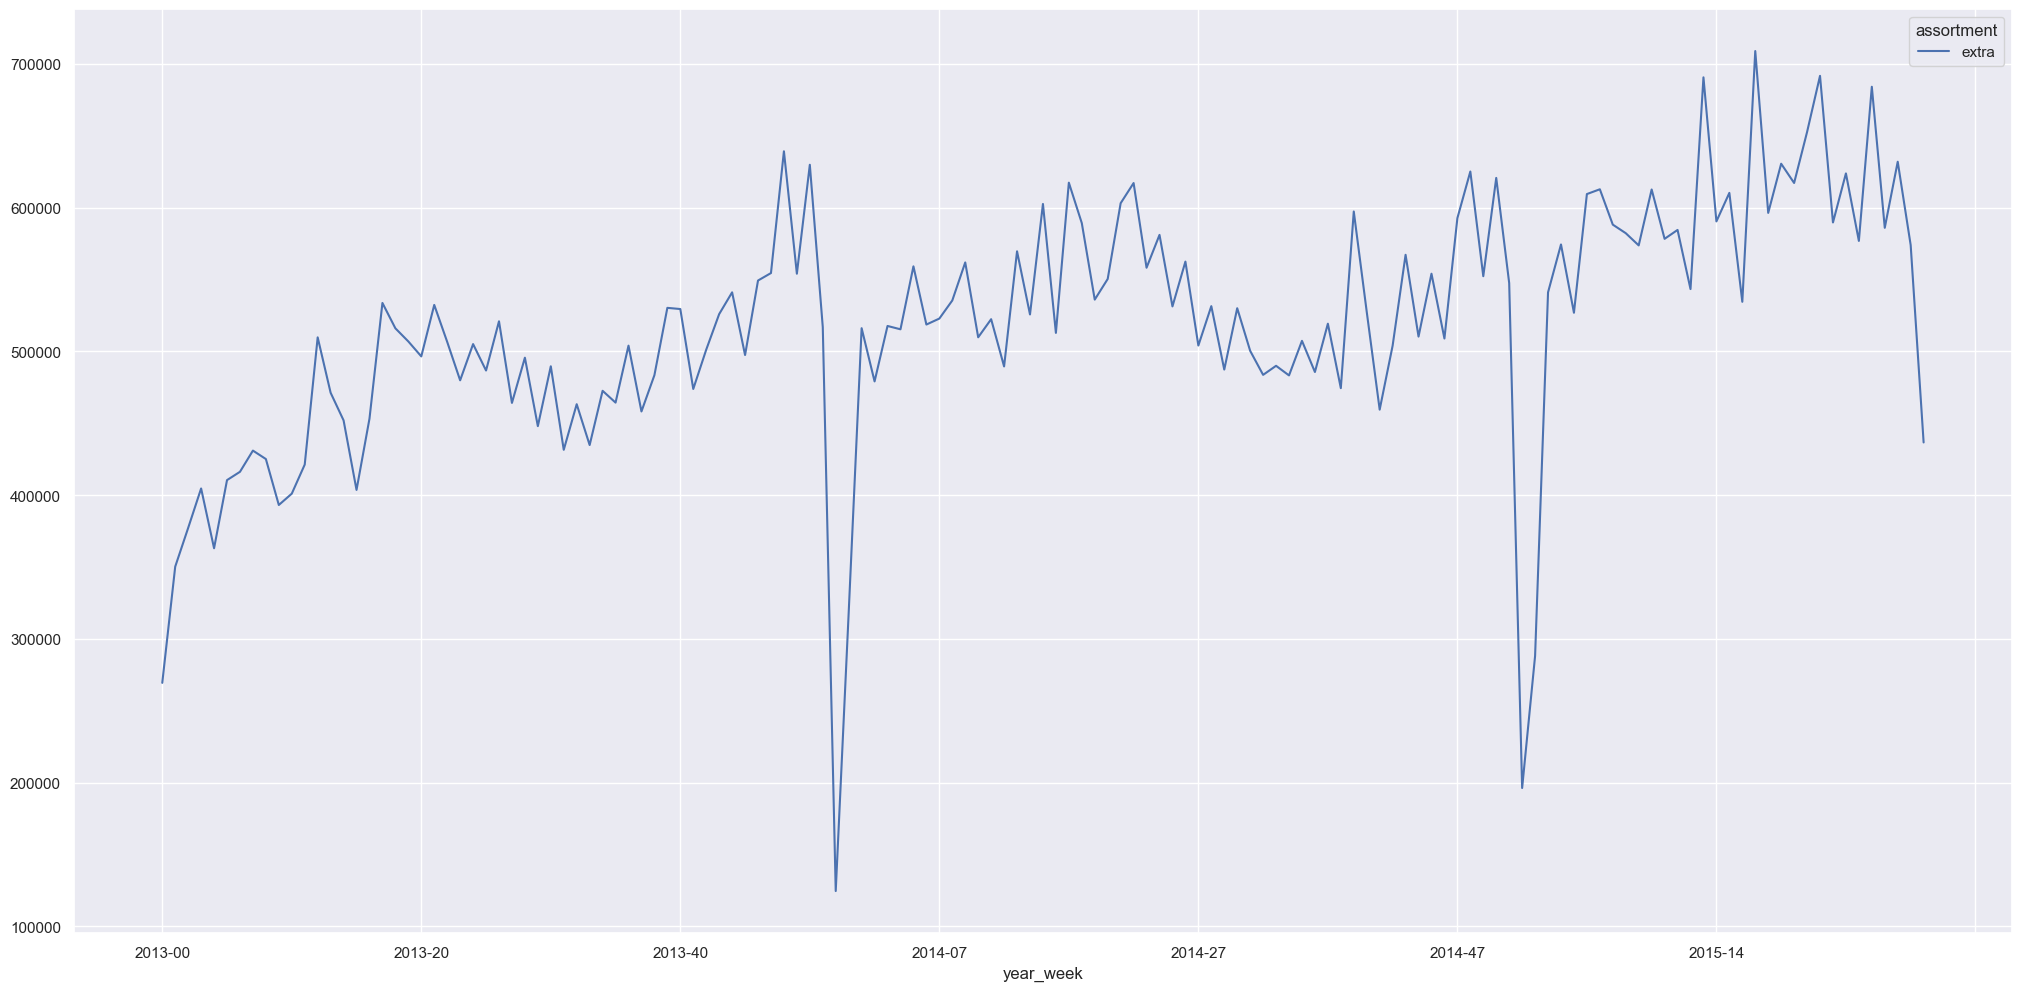

In [131]:
aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week','assortment']).sum().reset_index()
aux2.pivot (index = 'year_week' , columns = 'assortment', values= 'sales').plot()

aux3 =  aux2[aux2['assortment'] == 'extra']
aux3.pivot (index='year_week' , columns= 'assortment', values = 'sales').plot()

In [133]:
# <notion>

# .pivot (index = 'year_week' , columns = 'assortment', values= 'sales').plot() - para editar os indices e colunas do dataset e plotar em linha
    # aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week','assortment']).sum().reset_index()
    # aux2.pivot (index = 'year_week' , columns = 'assortment', values= 'sales').plot()                                                                     

### H5. Lojas com competidores mais próximos deveriam vender menos.
**REVISAR ESSA HIPOTESE**


<AxesSubplot:>

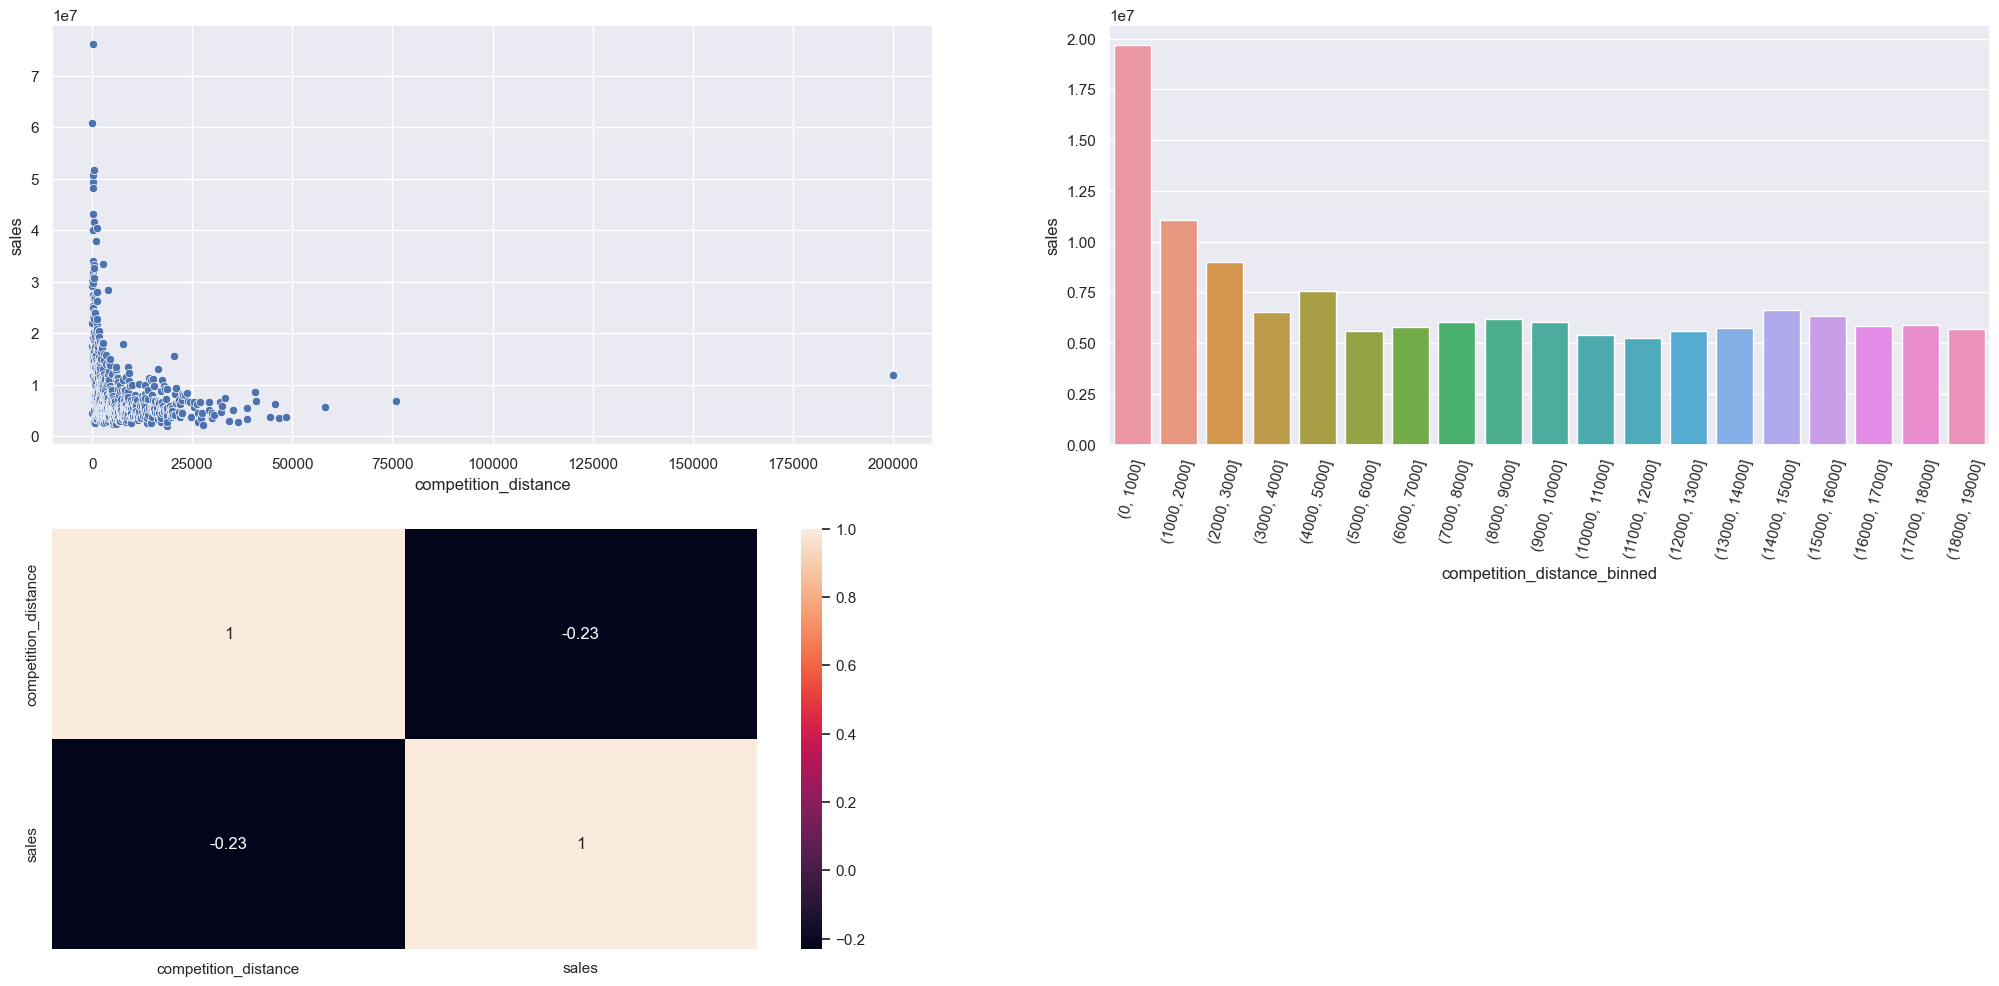

In [145]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

plt.subplot (2, 2, 1)
sns.scatterplot (x='competition_distance' ,y='sales' , data= aux1)
# se ha mais lojas com distancia menor entre concorrentes, havera tambem mais vendas (somatorio). O certo seria usar a
    # media para avaliar melhor o fenomeno

plt.subplot (2, 2, 2)
bins = list ( np.arange(0, 20000, 1000) ) 
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins = bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby ('competition_distance_binned').mean().reset_index()
sns.barplot (x= 'competition_distance_binned', y= 'sales', data = aux2)
plt.xticks(rotation=75);


plt.subplot (2,2,3)
sns.heatmap (aux1.corr (method = 'pearson'), annot = True)

In [ ]:
# <notion>

# np.arange( )- para criar uma lista de bins com o numpy
    # bins = list ( np.arange(0, 20000, 1000) )


# pd.cut( df, bins = ) - para estabelecer intervalos 'maiores' com base no tamanho do bin
    # aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins = bins )

# sns.heatmap (df.corr (method=), annot=bool) - mapa de calor para verificar correlacao 
    # sns.heatmap (aux1.corr (method = 'pearson'), annot = True)

### H6. Lojas com competidores à mais tempo deveriam vendem mais.

<AxesSubplot:>

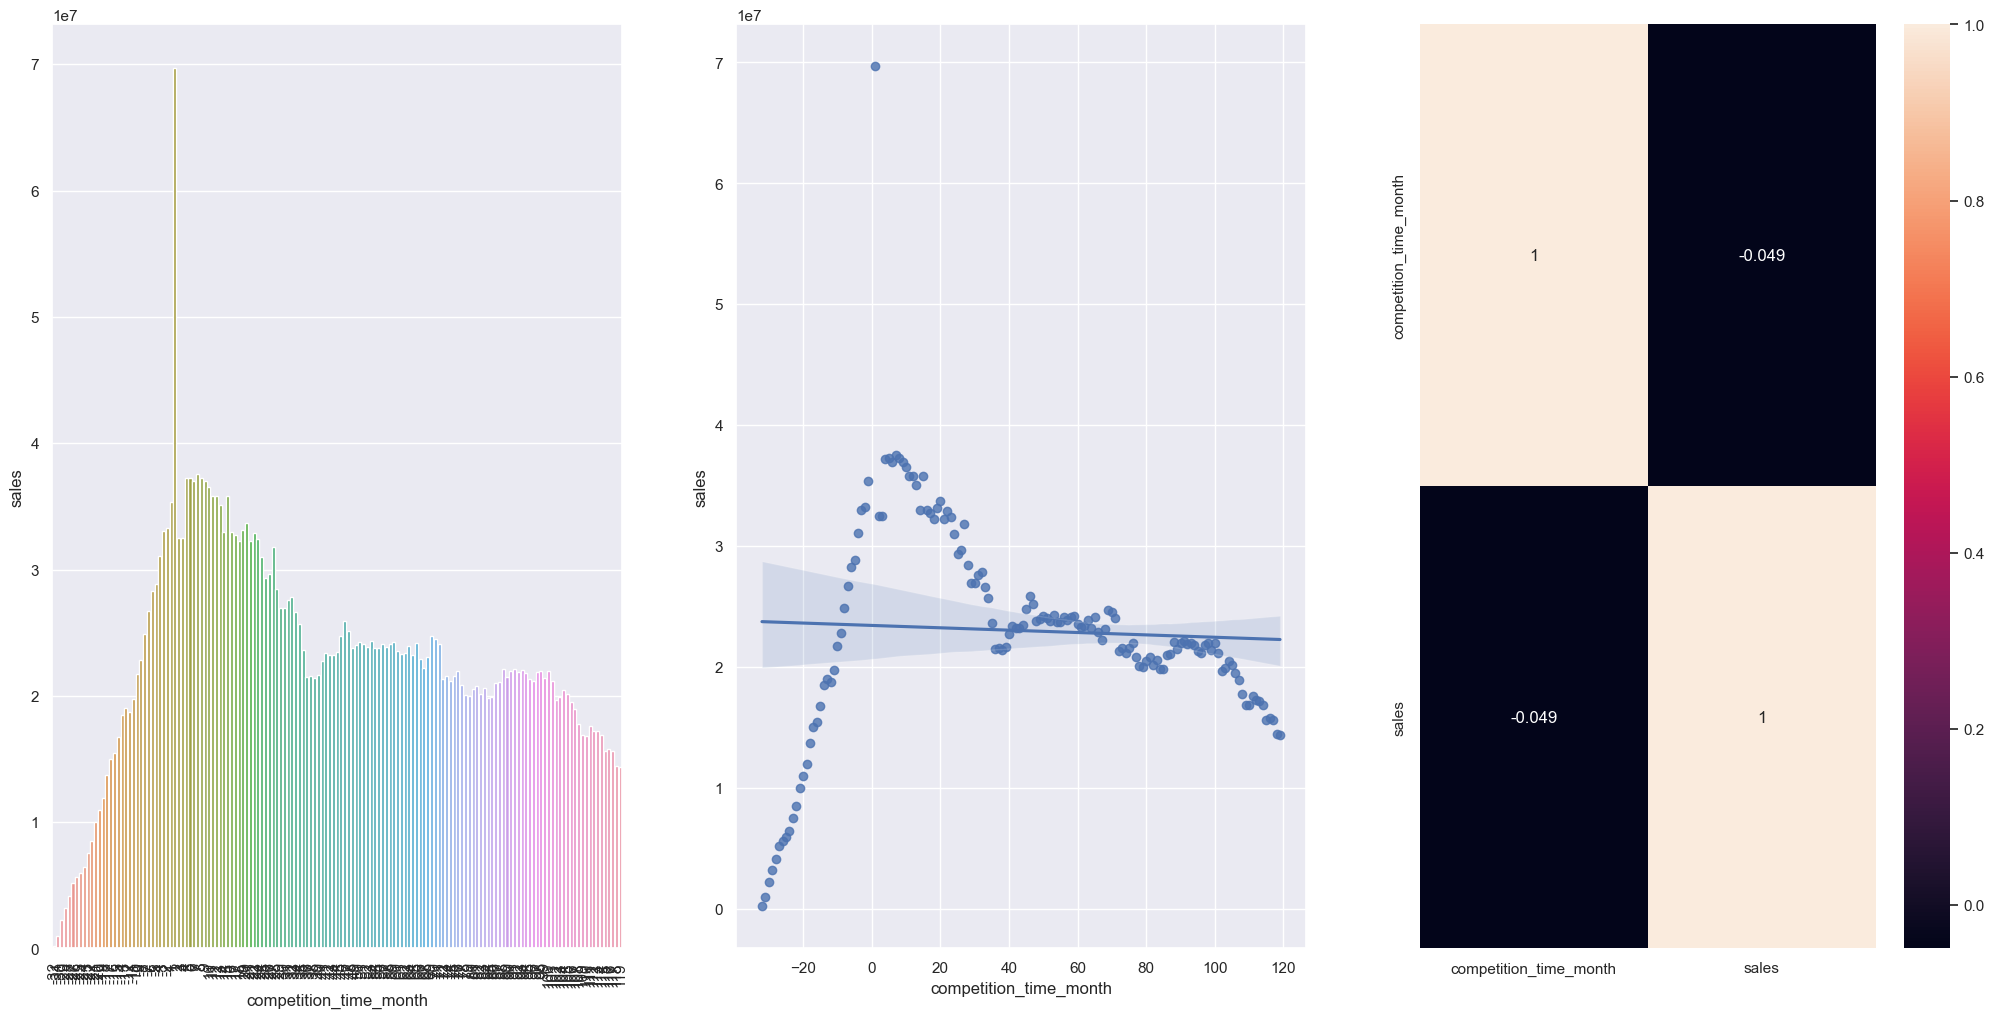

In [156]:
plt.subplot (1, 3, 1)
aux1 = df4[['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month']<120) & (aux1['competition_time_month'] != 0)]
sns.barplot (x='competition_time_month', y='sales', data = aux2);
plt.xticks (rotation = 90);

plt.subplot (1, 3, 2)
sns.regplot (x = 'competition_time_month', y='sales', data=aux2)

plt.subplot (1, 3, 3)
sns.heatmap (aux2.corr (method = 'pearson'), annot = True)

In [147]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

## Analise Multivariada
